# **YOLOV8 Frond Tracking**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### **1. Setting Up Google Colab**



In [ ]:
# to check and monitoring of NVIDIA GPU devices.
!nvidia-smi

### **2. YOLOV8 Installation:**

In [ ]:
# installing package to work with yolov8
!pip install ultralytics

### **3. Mounting Google Drive**



In [4]:
#from google.colab import drive
#drive.mount('/content/drive')
!git clone https://github.com/Balakishan77/Yolov8-Custom-Object-Detetction.git

Cloning into 'Yolov8-Custom-Object-Detetction'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 26 (delta 9), reused 17 (delta 6), pack-reused 3
Receiving objects: 100% (26/26), 64.68 MiB | 23.21 MiB/s, done.
Resolving deltas: 100% (9/9), done.


In [5]:
# check the uploaded data in drive
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!ls '/content/drive/MyDrive/images/model-training/well_data'
!ls '/content/drive/MyDrive/images/model-training/well_data/train'

ls: cannot access '/content/drive/MyDrive/images/model-training/well_data': No such file or directory
ls: cannot access '/content/drive/MyDrive/images/model-training/well_data/train': No such file or directory


### **YOLOV8 format:**


In [6]:
# Checking the size of images and displaying them
import numpy as np
import cv2
# Image shape in Training
image = cv2.imread('/content/drive/MyDrive/images/model-training/well_data/train/images/20220213_0_1.png')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the training image {}, {}".format(height, width))
# Image shape in validation
image = cv2.imread('/content/drive/MyDrive/images/model-training/well_data/train/images/image20220213-163332_11.png')
height = np.size(image, 0)
width = np.size(image, 1)
print ("shape of the validation image {}, {}".format(height, width))

IndexError: tuple index out of range

In [7]:
# dispying with different width
from IPython.display import Image
Image(filename='/content/drive/MyDrive/images/model-training/well_data/train/images/image20220213-163332_11.png', width=300)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/images/model-training/well_data/train/images/image20220213-163332_11.png'

### **4. Create mask_detetcion.yaml (dataset config file)**


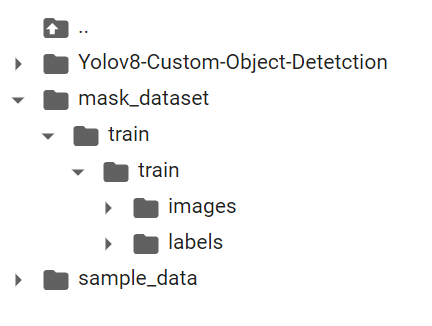

In [9]:
## Modify the code below with the appropriate links:

In [11]:

# write the content into a file
%%writefile /content/drive/MyDrive/models/frond_detection.yaml

# Train/val/test sets as 1) dir: path/to/imgs, 2) file: path/to/imgs.txt, or 3) list: [path/to/imgs1, path/to/imgs2, ..]
path: /content/drive/MyDrive/images/model-training/well_data # dataset root dir
val: valid_masks/images/ # val images (relative to 'path')
train: train_masks/images/ # train images (relative to 'path')
test:  # test images (optional)

# number of classes
nc: 1

# class names
#names: ['0']
names: [ 'frond']  # class names


Writing /content/drive/MyDrive/models/frond_detection.yaml


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/models/frond_detection.yaml'

### **5. Training  **


In [8]:
from ultralytics import YOLO
#model = YOLO("/content/drive/MyDrive/models/yolov8-fd-seg.pt")
import torch
torch.cuda.empty_cache()

In [ ]:
#from ultralytics import YOLO

# Load a model
#model = YOLO("yolov8m.yaml")  # build a new model from scratch
model = YOLO('yolov8m-seg.pt')  # load a pretrained model (recommended for training)


# Use the model
results = model.train(data="/content/drive/MyDrive/models/frond_detection.yaml", epochs=10, imgsz=640, mosaic=1, degrees=20, shear=1, hsv_v=0.1,hsv_s=0.1, hsv_h=0.1,fliplr=0.5, flipud=0.1, mixup=0.5)  # train the model

You can train again to improve the accuracy of the model. Feel free to modify the links below:

In [ ]:
model = YOLO("/content/runs/segment/train/weights/best.pt")
results = model.train(data="/content/drive/MyDrive/models/frond_detection.yaml", epochs=50, imgsz=640, mosaic=0.5, translate=0.05, degrees=5, shear=1, hsv_v=0.05,hsv_s=0.1, hsv_h=0.1,fliplr=0.5, flipud=0.1, mixup=0, overlap_mask=False)

### **Validation:**
Modify the link in the cell below:

In [ ]:
model = YOLO("/content/runs/segment/train2/weights/best.pt")
results = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.0.199 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/drive/MyDrive/images/model-training/well_data/valid_masks/labels.cache... 47 images, 10 backgrounds, 0 corrupt: 100%|██████████| 57/57 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:09<00:00,  2.26s/it]
                   all         57        565      0.808      0.871      0.901      0.579       0.79      0.843      0.866      0.417
Speed: 8.7ms preprocess, 33.0ms inference, 0.0ms loss, 4.4ms postprocess per image
Results saved to runs/segment/val


### **Metrics:**


In [ ]:
# dislaying metrics for train data
from IPython.display import Image
from IPython.display import display
x = Image(filename='runs/detect/train2/F1_curve.png')
y = Image(filename='runs/detect/train2/PR_curve.png')
z = Image(filename='runs/detect/train2/confusion_matrix.png')
display(x, y,z)

FileNotFoundError: ignored

### **Inference:**


In [ ]:
# checking the latest trained files
!ls '/content/runs/segment/train4/weights'

ls: cannot access '/content/runs/segment/train4/weights': No such file or directory


In [ ]:
# loading the trained model
model = YOLO("runs/segment/train/weights/best.pt")  # load a custom model

In [ ]:
# testing the model on a video
# results = model("/content/drive/MyDrive/datasets/mask_dataset/mask_testing.mp4")
#!yolo task=segment mode=predict model="/content/drive/MyDrive/Colab Notebooks/yolov8-seg-best.pt" source="/content/sample_data/separate_images/image_camA_0_0_20221018-194008_Plate1_a1.png" show_labels=False retina_masks=True boxes=True


Ultralytics YOLOv8.0.120 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients

image 1/1 /content/sample_data/separate_images/image_camA_0_0_20221018-194008_Plate1_a1.png: 640x640 4 fronds, 18.2ms
Speed: 9.9ms preprocess, 18.2ms inference, 260.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


In [ ]:
results = model_fd.predict("/content/sample_data/separate_images/image_camA_0_0_20221018-194008_Plate1_a2.png",show_labels=False)

for mask in ((results[0]).masks):
  print(mask)


image 1/1 /content/sample_data/separate_images/image_camA_0_0_20221018-194008_Plate1_a2.png: 640x640 5 fronds, 10.8ms
Speed: 4.8ms preprocess, 10.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.
WARNING ⚠️ 'Masks.segments' is deprecated. Use 'Masks.xyn' for segments (normalized) and 'Masks.xy' for segments (pixels) instead.
WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.
WARNING ⚠️ 'Masks.segments' is deprecated. Use 'Masks.xyn' for segments (normalized) and 'Masks.xy' for segments (pixels) instead.
WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.
WARNING ⚠️ 'Masks.segments' is deprecated. Use 'Masks.xyn' for segments (normalized) and 'Masks.xy' for segments (pixels) instead.
WARNING ⚠️ 'Masks.masks' is deprecated. Use 'Masks.data' instead.
WARNING ⚠️ 'Masks.segments' is deprecated. Use 'Masks.xyn' for segments (normalized) and 'Masks.xy' for segments (pixels) inste

ultralytics.yolo.engine.results.Masks object with attributes:

data: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0')
masks: tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]], device='cuda:0')
orig_shape: (831, 831)
segments: [array([[    0.50625,         0.5],
       [    0.50469,     0.50156],
       [    0.50313,     0.50156],
       [    0.49844,     0.50625],
       [    0.49844,     0.50781],
       [    0.49219,     0.51406],
       [    0.49219,     0.51562],
       [     0.4875,     0.52031],
       [     0.4875,     0.57031],
       [    0.490

In [ ]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/images/model-testing/cropped_12-well_plate/separate_images.zip","r") as zip_ref:
    zip_ref.extractall("/content/sample_data/")

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import skimage.draw
from skimage import io

def yolo_segment_to_binary_mask(segment, m):
    mask = np.zeros((m, m), dtype=np.uint8)
    #draw = ImageDraw.Draw(Image.fromarray(mask))

    # Convert coordinates to the range of the mask
    #segment = [[int(x), int(y)] for x, y in segment[0]]
    #annotation = [[int(x), int(y)] for x, y in segment[0]
    # Iterate over line segments and draw them on the mask
    annotationx=[]; annotationy=[];
    for i in range(len(segment[0])):
        x1, y1 = segment[0][i]
        annotationx.append(x1);
        annotationy.append(y1);
        #x2, y2 = segment[i + 1]
        #draw.line([(x1, y1), (x2, y2)], fill=255, width=1)
    #print(annotationx)
    if annotationy:
      rr, cc = skimage.draw.polygon(annotationy, annotationx)
      mask[rr, cc] = 1


    return mask

def calculate_accuracy(ground_truth_masks, predicted_masks):
    """
    Calculates the accuracy of predicted masks against ground truth masks.

    Args:
    ground_truth_masks (list): List of ground truth masks.
    predicted_masks (list): List of predicted masks.

    Returns:
    float: Accuracy of predicted masks.
    """

    # Create a copy of the predicted masks list to preserve the original order
    matched_predicted_masks = predicted_masks[:]

    # Create a list to store the matched indices
    matched_indices = []

    # Iterate over the ground truth masks and find the best match for each mask
    acc=[];
    for ground_truth_mask in ground_truth_masks:
        best_match_index = None
        best_iou = 0.0

        # Iterate over the remaining predicted masks to find the best match
        for i, predicted_mask in enumerate(matched_predicted_masks):
            intersection = (ground_truth_mask & predicted_mask).sum()
            union = (ground_truth_mask | predicted_mask).sum()
            iou = intersection / union

            if iou > best_iou:
                best_iou = iou
                best_match_index = i
                best_intersection = intersection;
                best_predicted_mask = predicted_mask

        # If a match is found, add the matched index to the list
        if best_match_index is not None:
            matched_indices.append(best_match_index)
            # Remove the matched mask from the list to prevent duplicate matches
            matched_predicted_masks.pop(best_match_index)
            #acc.append(best_intersection/best_predicted_mask.sum())
            acc.append(best_iou)
        else:
            acc.append(0)

    # Calculate the accuracy as the number of matched masks divided by the total number of ground truth masks
    #accuracy = len(matched_indices) / len(ground_truth_masks)
    accuracy = sum(acc) / len(acc)
    #print(matched_indices)
    #print(len(ground_truth_masks))
    return accuracy

def decode(results):
  img = results[0].orig_img; masks=[];
  #print(len((results[0])))
  for mask in (results[0]).masks:
    color=np.random.rand(1,3)*255
    segment = mask.xy
    binary_mask =  yolo_segment_to_binary_mask(segment,(results[0].orig_img).shape[0])
    masks.append(binary_mask)
    img[binary_mask>0.5] = color;
    #print(np.sum(binary_mask))
    #print()
#    plt.imshow(binary_mask)
#    plt.show()
  #masks=np.squeeze(masks);
  return masks#img, binary_mask

def get_masks_from_image_simple(image,model,score = 0.5):
    #sample = image
    #image = image.to(DEVICE)
    #model.eval()
    results = model.predict(image,show_labels=False)
    masks = decode(results)
    #outputs = model([image.to(DEVICE)])[0]
    #outputs = [{k: v.to(device) for k, v in t.items()} for t in outputs]
    #masks = (outputs['masks']).cpu().detach().numpy();
    return masks;



def get_bounding_boxes(masks):
    bounding_boxes = []
    for mask in masks:
        indices = np.where(mask)
        if np.any(indices):  # Check if the mask is non-empty
            ymin, ymax = np.min(indices[0]), np.max(indices[0])
            xmin, xmax = np.min(indices[1]), np.max(indices[1])
            bounding_boxes.append((ymin, xmin, ymax, xmax))
        else:
            bounding_boxes.append(None)  # Empty mask, append None
    return bounding_boxes


masks_fd = []; masks_dw = [];
boxes_fd = []; boxes_dw = [];
## change the link below to generate the masks
list_of_files = os.listdir("/content/sample_data/separate_images");
list_of_files.sort()

from ultralytics import YOLO
#model = YOLO("/content/sample_data/yolov8-seg-best.pt")

#model_dw = YOLO("/content/drive/MyDrive/Colab Notebooks/yolov8-dw-seg.pt")  # load a custom model
#model_fd = YOLO("/content/drive/MyDrive/Colab Notebooks/yolov8-seg-best.pt")  # load a custom model
##load the model that was just trained:
model_fd = YOLO("/content/drive/MyDrive/models/yolov8-fd-seg.pt");

for img in list_of_files:
  image = plt.imread(f"/content/sample_data/separate_images/{img}");
  image = image[:,:,0:3]*255; imm = image.copy()
  masks_fd.append(get_masks_from_image_simple(image,model_fd,score = 0.5))
  #image = plt.imread(f"/content/sample_data/separate_images/{img}");
  #image = image[:,:,0:3]*255;
  #masks_dw.append(get_masks_from_image_simple(imm,model_dw,score = 0.5))
  boxes_fd.append(get_bounding_boxes(np.array(masks_fd)))
  #boxes_dw.append(get_bounding_boxes(np.array(masks_dw)))

predicted_masks = masks;
print(list_of_files)


0: 640x640 4 fronds, 11.2ms
Speed: 43.7ms preprocess, 11.2ms inference, 26.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 fronds, 9.8ms
Speed: 6.0ms preprocess, 9.8ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 5 fronds, 9.9ms
Speed: 6.6ms preprocess, 9.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 fronds, 9.8ms
Speed: 5.0ms preprocess, 9.8ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)
<ipython-input-24-1fe864a5ee0e>:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  boxes_fd.append(get_bounding_boxes(np.array(masks_fd)))

0: 640x640 3 fronds, 9.8ms
Speed: 5.1ms preprocess, 9.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 f

KeyboardInterrupt: ignored

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import skimage.draw
from skimage import io

def yolo_segment_to_binary_mask(segment, m):
    mask = np.zeros((m, m), dtype=np.uint8)
    #draw = ImageDraw.Draw(Image.fromarray(mask))

    # Convert coordinates to the range of the mask
    #segment = [[int(x), int(y)] for x, y in segment[0]]
    #annotation = [[int(x), int(y)] for x, y in segment[0]
    # Iterate over line segments and draw them on the mask
    annotationx=[]; annotationy=[];
    for i in range(len(segment[0])):
        x1, y1 = segment[0][i]
        annotationx.append(x1);
        annotationy.append(y1);
        #x2, y2 = segment[i + 1]
        #draw.line([(x1, y1), (x2, y2)], fill=255, width=1)
    #print(annotationx)
    if annotationy:
      rr, cc = skimage.draw.polygon(annotationy, annotationx)
      mask[rr, cc] = 1


    return mask

def calculate_accuracy(ground_truth_masks, predicted_masks):
    """
    Calculates the accuracy of predicted masks against ground truth masks.

    Args:
    ground_truth_masks (list): List of ground truth masks.
    predicted_masks (list): List of predicted masks.

    Returns:
    float: Accuracy of predicted masks.
    """

    # Create a copy of the predicted masks list to preserve the original order
    matched_predicted_masks = predicted_masks[:]

    # Create a list to store the matched indices
    matched_indices = []

    # Iterate over the ground truth masks and find the best match for each mask
    acc=[];
    for ground_truth_mask in ground_truth_masks:
        best_match_index = None
        best_iou = 0.0

        # Iterate over the remaining predicted masks to find the best match
        for i, predicted_mask in enumerate(matched_predicted_masks):
            intersection = (ground_truth_mask & predicted_mask).sum()
            union = (ground_truth_mask | predicted_mask).sum()
            iou = intersection / union

            if iou > best_iou:
                best_iou = iou
                best_match_index = i
                best_intersection = intersection;
                best_predicted_mask = predicted_mask

        # If a match is found, add the matched index to the list
        if best_match_index is not None:
            matched_indices.append(best_match_index)
            # Remove the matched mask from the list to prevent duplicate matches
            matched_predicted_masks.pop(best_match_index)
            #acc.append(best_intersection/best_predicted_mask.sum())
            acc.append(best_iou)
        else:
            acc.append(0)

    # Calculate the accuracy as the number of matched masks divided by the total number of ground truth masks
    #accuracy = len(matched_indices) / len(ground_truth_masks)
    accuracy = sum(acc) / len(acc)
    #print(matched_indices)
    #print(len(ground_truth_masks))
    return accuracy

def decode(results):
  img = results[0].orig_img; masks=[];
  #print(len((results[0])))
  for mask in (results[0]).masks:
    color=np.random.rand(1,3)*255
    segment = mask.xy
    binary_mask =  yolo_segment_to_binary_mask(segment,(results[0].orig_img).shape[0])
    masks.append(binary_mask)
    img[binary_mask>0.5] = color;
    #print(np.sum(binary_mask))
    #print()
#    plt.imshow(binary_mask)
#    plt.show()
  #masks=np.squeeze(masks);
  return masks#img, binary_mask

def get_masks_from_image_simple(image,model,score = 0.5):
    #sample = image
    #image = image.to(DEVICE)
    #model.eval()
    results = model.predict(image,show_labels=False)
    masks = decode(results)
    #outputs = model([image.to(DEVICE)])[0]
    #outputs = [{k: v.to(device) for k, v in t.items()} for t in outputs]
    #masks = (outputs['masks']).cpu().detach().numpy();
    return masks;



def get_bounding_boxes(masks):
    bounding_boxes = []
    for mask in masks:
        indices = np.where(mask)
        if np.any(indices):  # Check if the mask is non-empty
            ymin, ymax = np.min(indices[0]), np.max(indices[0])
            xmin, xmax = np.min(indices[1]), np.max(indices[1])
            bounding_boxes.append((ymin, xmin, ymax, xmax))
        else:
            bounding_boxes.append(None)  # Empty mask, append None
    return bounding_boxes


masks_fd = []; masks_dw = [];
boxes_fd = []; boxes_dw = [];
list_of_files = os.listdir("/content/drive/MyDrive/images/model-training/well_data/train_masks/images");
list_of_files.sort()

from ultralytics import YOLO
#model = YOLO("/content/sample_data/yolov8-seg-best.pt")

#model_dw = YOLO("/content/drive/MyDrive/Colab Notebooks/yolov8-dw-seg.pt")  # load a custom model
#model_fd = YOLO("/content/drive/MyDrive/Colab Notebooks/yolov8-seg-best.pt")  # load a custom model
model_fd = YOLO("/content/drive/MyDrive/models/yolov8-fd-seg.pt");

os.mkdir("/content/sample_data/train");

for img in list_of_files:
  image = plt.imread(f"/content/drive/MyDrive/images/model-training/well_data/train_masks/images/{img}");
  image = image[:,:,0:3]*255; imm = image.copy()
  masks = get_masks_from_image_simple(image,model_fd,score = 0.5)
  #if len(masks)>0:
    #masks_fd.append(masks)
  for i,mask in enumerate(masks):
    plt.imsave(f"/content/sample_data/train/{img}_{i}.png",mask)
  #image = plt.imread(f"/content/sample_data/separate_images/{img}");
  #image = image[:,:,0:3]*255;
  #masks_dw.append(get_masks_from_image_simple(imm,model_dw,score = 0.5))
  boxes_fd.append(get_bounding_boxes(np.array(masks_fd)))
  #boxes_dw.append(get_bounding_boxes(np.array(masks_dw)))

predicted_masks = masks;
print(list_of_files)


0: 640x640 36 fronds, 12.3ms
Speed: 62.7ms preprocess, 12.3ms inference, 34.6ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 53 fronds, 10.1ms
Speed: 12.7ms preprocess, 10.1ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 68 fronds, 10.1ms
Speed: 15.5ms preprocess, 10.1ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 51 fronds, 12.2ms
Speed: 6.8ms preprocess, 12.2ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 55 fronds, 10.1ms
Speed: 7.3ms preprocess, 10.1ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 78 fronds, 10.1ms
Speed: 6.5ms preprocess, 10.1ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)


KeyboardInterrupt: ignored


0: 640x640 21 fronds, 52.4ms
Speed: 10.8ms preprocess, 52.4ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 12 fronds, 8.0ms
Speed: 5.4ms preprocess, 8.0ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)


indexes =[0, 4, 5, 6, 2, 1, 7, 5, 4, 7, 3, -1, 2, 6, -1, -1, 2, 0, 2, -1]


 
 
***NEW***
 



0: 640x640 19 fronds, 40.9ms
Speed: 7.5ms preprocess, 40.9ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 640)


[[          0           2]
 [          1           1]
 [          2           4]
 [          3           1]
 [          4           2]
 [          5           2]
 [          6           2]
 [          7           2]]
[[0, 0], [1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7]]



0: 640x640 12 fronds, 10.1ms
Speed: 7.6ms preprocess, 10.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


indexes =[5, 7, 0, 3, 2, -1, 4, 2, 6, 1, 1, 8, 4, 3, 9, 6, 8]
duckweed_obj = [array([      694.5,         463]), array([        562,         513]), array([      354.5,         557]), [], array([      713.5,         277]), array([      628.5,       675.5]), array([        419,         544]), [], array([        474,       523.5]), array([      466.5,       383.5]), array([        437,       488.5]), array([      445.5,         429])]
map_dw_obj = [[0, 1], [1, 2], [2, 4], [3, 6], [5, 0], [7, 5], [4, 8], [6, 9], [8, 10], [9, 11]]
split_indices = [7, 3]
[array([      694.5,         463]), array([        562,         513]), array([      354.5,         557]), [], array([      713.5,         277]), array([      628.5,       675.5]), array([        419,         544]), [], array([        474,       523.5]), array([      466.5,       383.5]), array([        437,       488.5]), array([      445.5,         429])]
map_dw_obj = [[0, 1], [1, 2], [2, 4], [3, 6], [4, 8], [5, 0], [6, 9], [7, 5], [8, 10],

 
 
***NEW***
 



0: 640x640 18 fronds, 52.6ms
Speed: 6.9ms preprocess, 52.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


[[          1           1]
 [          2           2]
 [          4           2]
 [          6           2]
 [          8           2]
 [          0           1]
 [          9           2]
 [          5           1]
 [         10           2]
 [         11           1]
 [          0           0]]
[[0, 1], [1, 2], [2, 4], [3, 6], [4, 8], [5, 0], [6, 9], [7, 5], [8, 10], [9, 11]]



0: 640x640 14 fronds, 10.1ms
Speed: 8.0ms preprocess, 10.1ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


indexes =[6, 5, 0, 7, 2, 1, -1, 2, 10, 6, 5, 10, 4, 4, 3, 9]
duckweed_obj = [array([        691,       460.5]), array([      559.5,         510]), array([      349.5,       554.5]), [], array([      709.5,         272]), array([      621.5,         673]), array([        420,         544]), [], array([        469,         516]), [], [], [], array([      414.5,       398.5]), array([      453.5,       427.5]), array([        415,       499.5]), array([        456,         461])]
map_dw_obj = [[1, 1], [2, 2], [3, 0], [4, 8], [5, 4], [6, 6], [7, 5], [0, 12], [8, 13], [9, 14], [10, 15]]
split_indices = [9, 8]
[array([        691,       460.5]), array([      559.5,         510]), array([      349.5,       554.5]), [], array([      709.5,         272]), array([      621.5,         673]), array([        420,         544]), [], array([        469,         516]), [], [], [], array([      414.5,       398.5]), array([      453.5,       427.5]), array([        415,       499.5]), array([        45

 
 
***NEW***
 



0: 640x640 19 fronds, 53.2ms
Speed: 5.9ms preprocess, 53.2ms inference, 4.4ms postprocess per image at shape (1, 3, 640, 640)


[[         12           1]
 [          1           1]
 [          2           2]
 [          0           1]
 [          8           2]
 [          4           2]
 [          6           2]
 [          5           1]
 [          0           0]
 [         14           1]
 [         15           2]
 [          0           0]]
[[0, 12], [1, 1], [2, 2], [3, 0], [4, 8], [5, 4], [6, 6], [7, 5], [8, 13], [9, 14], [10, 15]]



0: 640x640 13 fronds, 27.7ms
Speed: 9.4ms preprocess, 27.7ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


indexes =[3, 8, 5, 8, 2, 9, 2, 3, 0, 6, 5, 1, 6, 4, 7, 9, 3]
duckweed_obj = [array([        697,       463.5]), array([        562,         513]), array([      354.5,         557]), [], array([        715,         277]), array([        627,       673.5]), array([        414,         547]), [], array([      463.5,       512.5]), [], [], [], array([      419.5,       398.5]), array([        456,       417.5]), array([      406.5,         503]), array([      463.5,         461])]
map_dw_obj = [[0, 12], [1, 1], [2, 4], [3, 2], [4, 0], [5, 6], [6, 8], [7, 14], [8, 5], [9, 15], [10, 13]]
split_indices = []
[array([        697,       463.5]), array([        562,         513]), array([      354.5,         557]), [], array([        715,         277]), array([        627,       673.5]), array([        414,         547]), [], array([      463.5,       512.5]), [], [], [], array([      419.5,       398.5]), array([        456,       417.5]), array([      406.5,         503]), array([      463.5,  

 
 
***NEW***
 



0: 640x640 19 fronds, 52.6ms
Speed: 6.3ms preprocess, 52.6ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)


[[         12           1]
 [          1           1]
 [          4           2]
 [          2           3]
 [          0           1]
 [          6           2]
 [          8           2]
 [         14           1]
 [          5           2]
 [         15           2]
 [          0           0]
 [          0           0]]
[[0, 12], [1, 1], [2, 4], [3, 2], [4, 0], [5, 6], [6, 8], [7, 14], [8, 5], [9, 15], [10, 13]]



0: 640x640 13 fronds, 11.8ms
Speed: 7.5ms preprocess, 11.8ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)


indexes =[8, 2, 3, 0, 6, 4, 1, 7, 8, 0, 4, 10, 6, 3, 10, 9, 5, 7]
duckweed_obj = [array([        697,         466]), array([      564.5,         516]), array([      357.5,       562.5]), [], array([        715,         277]), array([        627,         679]), array([      418.5,         552]), [], array([      463.5,         516]), [], [], [], array([      419.5,         404]), array([      458.5,         425]), array([      406.5,       508.5]), array([      467.5,       466.5])]
map_dw_obj = [[0, 2], [1, 12], [2, 1], [3, 6], [4, 4], [5, 14], [6, 8], [7, 0], [8, 5], [9, 13], [10, 15]]
split_indices = []
[array([        697,         466]), array([      564.5,         516]), array([      357.5,       562.5]), [], array([        715,         277]), array([        627,         679]), array([      418.5,         552]), [], array([      463.5,         516]), [], [], [], array([      419.5,         404]), array([      458.5,         425]), array([      406.5,       508.5]), array([      467

 
 
***NEW***
 
[[          2           2]
 [         12           1]
 [          1           1]
 [          6           2]
 [          4           2]
 [         14           1]
 [          8           2]
 [          0           2]
 [          5           2]
 [         13           1]
 [         15           2]
 [          0           0]]
[[0, 2], [1, 12], [2, 1], [3, 6], [4, 4], [5, 14], [6, 8], [7, 0], [8, 5], [9, 13], [10, 15]]



0: 640x640 21 fronds, 53.8ms
Speed: 7.7ms preprocess, 53.8ms inference, 5.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 13 fronds, 29.4ms
Speed: 7.4ms preprocess, 29.4ms inference, 8.9ms postprocess per image at shape (1, 3, 640, 640)


indexes =[3, 4, 10, 8, 8, 3, 0, 7, 5, 9, 2, 4, 2, 10, 5, 6, 7, 1, 2]
duckweed_obj = [array([        700,       463.5]), array([      567.5,         513]), array([        360,         557]), [], array([        720,         277]), array([      632.5,       677.5]), array([        420,         547]), [], array([      463.5,       511.5]), [], [], [], [], [], array([      406.5,         505]), array([      427.5,         458]), array([        453,       422.5]), array([        495,         430])]
map_dw_obj = [[0, 1], [2, 8], [3, 2], [4, 4], [6, 0], [7, 15], [8, 5], [9, 14], [10, 6], [1, 16], [5, 17]]
split_indices = [8]
[array([        700,       463.5]), array([      567.5,         513]), array([        360,         557]), [], array([        720,         277]), array([      632.5,       677.5]), array([        420,         547]), [], array([      463.5,       511.5]), [], [], [], [], [], array([      406.5,         505]), array([      427.5,         458]), array([        453,       422.5

 
 
***NEW***
 



0: 640x640 19 fronds, 52.7ms
Speed: 6.9ms preprocess, 52.7ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


[[          1           1]
 [         16           1]
 [          8           3]
 [          2           2]
 [          4           2]
 [         17           2]
 [          0           1]
 [         15           2]
 [          5           2]
 [         14           1]
 [          6           2]
 [          0           0]]
[[0, 1], [1, 16], [2, 8], [3, 2], [4, 4], [5, 17], [6, 0], [7, 15], [8, 5], [9, 14], [10, 6]]



0: 640x640 14 fronds, 10.4ms
Speed: 7.1ms preprocess, 10.4ms inference, 2.9ms postprocess per image at shape (1, 3, 640, 640)


indexes =[7, 9, 9, 8, 1, 1, 4, 2, 0, 5, 7, 2, 8, 6, 10, 5, 4, 5]
duckweed_obj = [array([      700.5,         460]), array([      567.5,       507.5]), array([        360,       551.5]), [], array([      720.5,       274.5]), array([      632.5,       672.5]), array([        420,         541]), [], array([      463.5,       505.5]), [], [], [], [], [], array([      406.5,       500.5]), array([      432.5,         455]), array([        453,         417]), array([        495,       424.5])]
map_dw_obj = [[0, 1], [1, 2], [2, 8], [3, 16], [4, 15], [5, 17], [6, 0], [7, 4], [8, 6], [9, 5], [10, 14]]
split_indices = []
[array([      700.5,         460]), array([      567.5,       507.5]), array([        360,       551.5]), [], array([      720.5,       274.5]), array([      632.5,       672.5]), array([        420,         541]), [], array([      463.5,       505.5]), [], [], [], [], [], array([      406.5,       500.5]), array([      432.5,         455]), array([        453,         417]), a

 
 
***NEW***
 



0: 640x640 20 fronds, 52.6ms
Speed: 6.8ms preprocess, 52.6ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


[[          1           1]
 [          2           2]
 [          8           2]
 [          0           0]
 [         15           2]
 [         17           3]
 [          0           1]
 [          4           2]
 [          6           2]
 [          5           2]
 [         14           1]
 [          0           0]]
[[0, 1], [1, 2], [2, 8], [3, 16], [4, 15], [5, 17], [6, 0], [7, 4], [8, 6], [9, 5], [10, 14]]



0: 640x640 13 fronds, 10.4ms
Speed: 7.4ms preprocess, 10.4ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


indexes =[7, 0, 8, 6, 5, 3, 0, 4, 8, 9, 9, 1, 5, 6, 4, 2, -1, 1, 3]
duckweed_obj = [array([        702,         466]), array([      566.5,       515.5]), array([        360,         557]), [], array([      720.5,         279]), array([      632.5,         678]), array([        420,       549.5]), [], array([      463.5,         513]), [], [], [], [], [], array([      406.5,       509.5]), array([      432.5,         464]), array([        453,         420]), array([        495,       432.5])]
map_dw_obj = [[0, 2], [1, 1], [2, 16], [3, 17], [4, 8], [5, 6], [6, 4], [7, 0], [8, 5], [9, 15], [10, 14]]
split_indices = []
[array([        702,         466]), array([      566.5,       515.5]), array([        360,         557]), [], array([      720.5,         279]), array([      632.5,         678]), array([        420,       549.5]), [], array([      463.5,         513]), [], [], [], [], [], array([      406.5,       509.5]), array([      432.5,         464]), array([        453,         420])

 
 
***NEW***
 



0: 640x640 22 fronds, 52.8ms
Speed: 6.4ms preprocess, 52.8ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)


[[          2           2]
 [          1           2]
 [         16           1]
 [         17           2]
 [          8           2]
 [          6           2]
 [          4           2]
 [          0           1]
 [          5           2]
 [         15           2]
 [          0           0]
 [          0           0]]
[[0, 2], [1, 1], [2, 16], [3, 17], [4, 8], [5, 6], [6, 4], [7, 0], [8, 5], [9, 15], [10, 14]]



0: 640x640 13 fronds, 10.1ms
Speed: 7.6ms preprocess, 10.1ms inference, 5.4ms postprocess per image at shape (1, 3, 640, 640)


indexes =[9, 10, 10, 5, 0, 0, 7, 5, 1, 9, 8, 4, 3, 3, 4, 5, 6, 7, 2, 0, 8]
duckweed_obj = [array([      699.5,       458.5]), array([      567.5,       507.5]), array([        361,       554.5]), [], array([      720.5,         273]), array([      632.5,         671]), array([        419,         540]), [], array([      463.5,         505]), [], [], [], [], [], array([      406.5,       497.5]), array([        430,         453]), array([        453,       413.5]), array([        495,       427.5])]
map_dw_obj = [[0, 2], [1, 1], [2, 16], [3, 8], [4, 17], [5, 6], [6, 0], [7, 15], [8, 14], [9, 4], [10, 5]]
split_indices = []
[array([      699.5,       458.5]), array([      567.5,       507.5]), array([        361,       554.5]), [], array([      720.5,         273]), array([      632.5,         671]), array([        419,         540]), [], array([      463.5,         505]), [], [], [], [], [], array([      406.5,       497.5]), array([        430,         453]), array([        453,       

 
 
***NEW***
 
[[          2           3]
 [          1           1]
 [         16           1]
 [          8           2]
 [         17           2]
 [          6           3]
 [          0           1]
 [         15           2]
 [         14           2]
 [          4           2]
 [          5           2]
 [          0           0]]
[[0, 2], [1, 1], [2, 16], [3, 8], [4, 17], [5, 6], [6, 0], [7, 15], [8, 14], [9, 4], [10, 5]]
[[2 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [4 2 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<ipython-input-24-a6424d525a56>:872: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


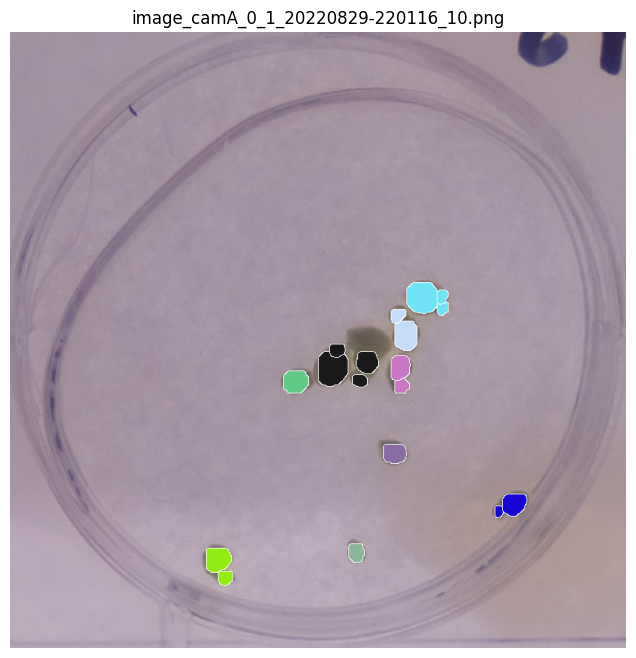

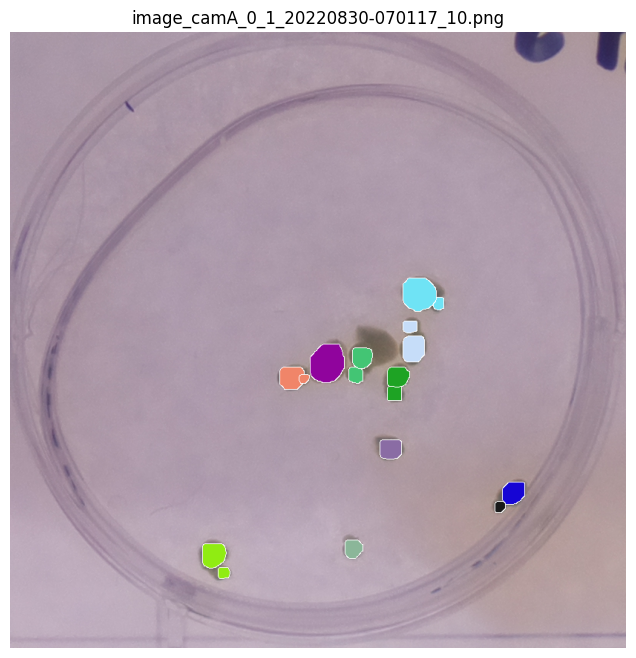

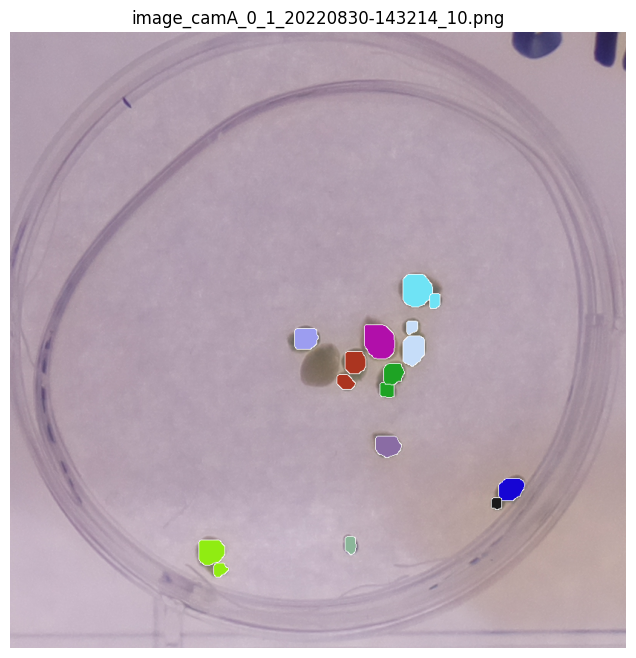

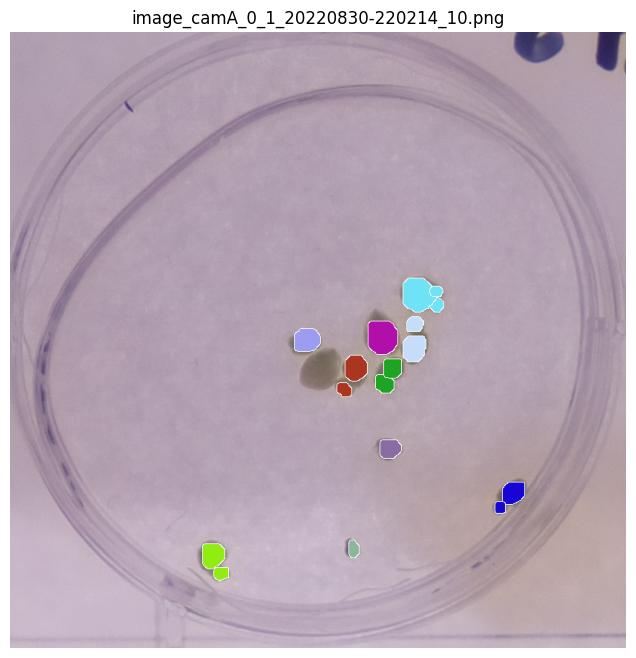

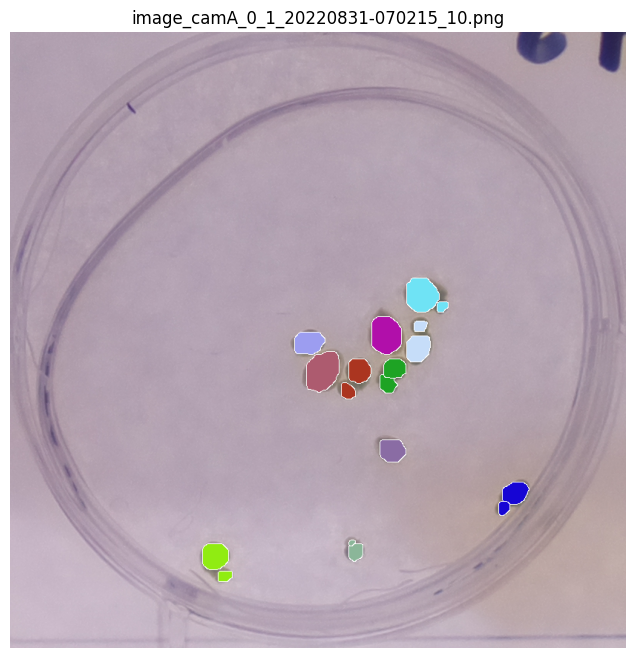

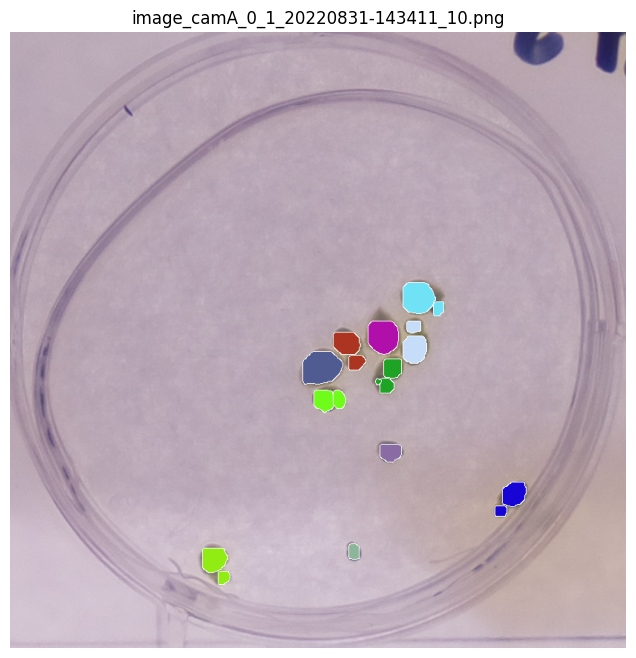

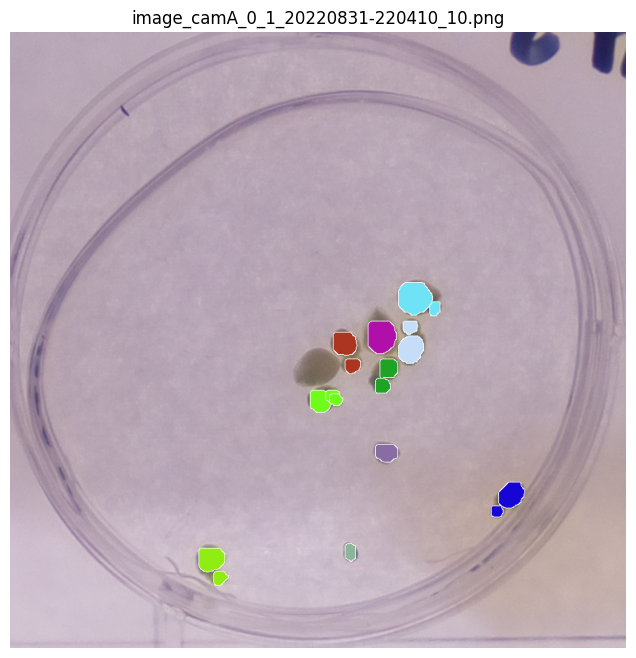

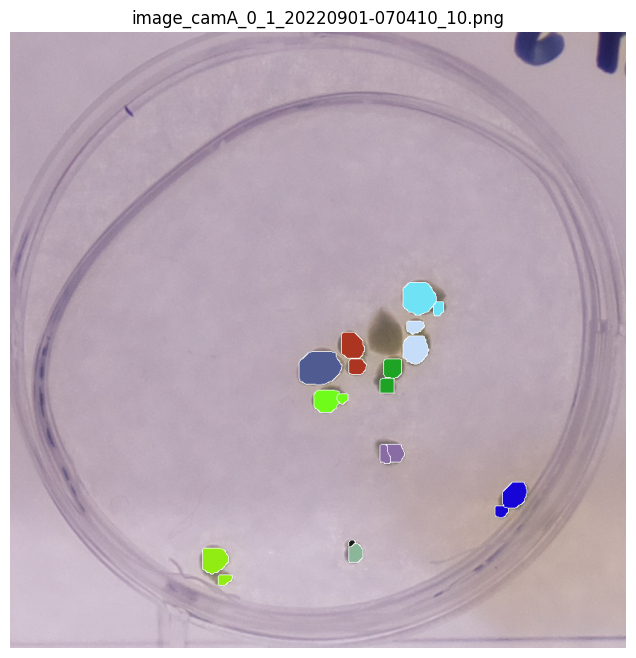

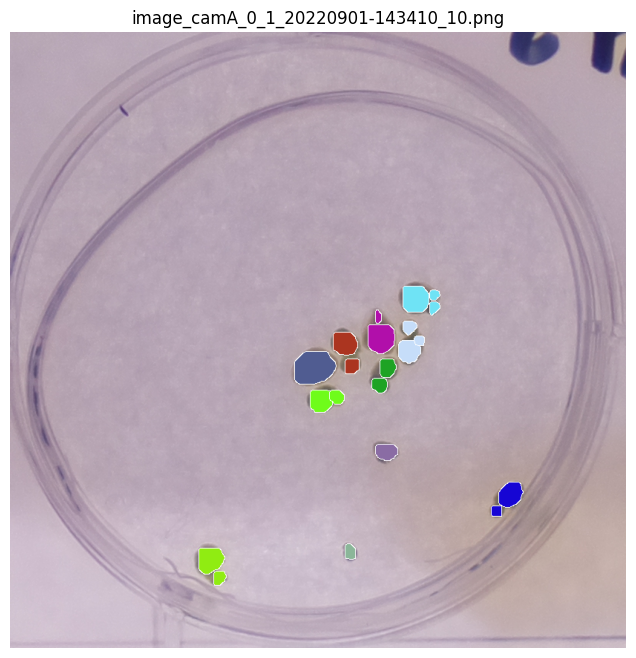

In [ ]:
import os
def assign_indexes(rectangles):
    """
    Assigns indexes to rectangles based on intersection or touching.
    """
    index = 0
    indexes = {}
    for i, rect1 in enumerate(rectangles):
        if i in indexes:
            continue
        indexes[i] = index
        for j, rect2 in enumerate(rectangles[i+1:], start=i+1):
            if rect1[0] + rect1[2] <= rect2[0] or rect2[0] + rect2[2] <= rect1[0]:
                continue
            if rect1[1] + rect1[3] <= rect2[1] or rect2[1] + rect2[3] <= rect1[1]:
                continue
            if j not in indexes:
                indexes[j] = index
        index += 1
    return [indexes[i] for i in range(len(rectangles))]


def assign_indexes_obj(rectangle_coordinates):
    """
    Assigns indexes to rectangles based on intersection or touching,
    only if at least 60% of the area of a rectangle is contained in the area of another rectangle.
    """
    rectangles = []
    for coord in rectangle_coordinates:
        x1, y1, x2, y2 = coord
        width = x2 - x1
        height = y2 - y1
        rectangles.append((x1, y1, width, height))
    index = 0
    indexes = {}
    for i, rect1 in enumerate(rectangles):
        if i in indexes:
            continue
        indexes[i] = index
        for j, rect2 in enumerate(rectangles[i+1:], start=i+1):
            if rect1[0] + rect1[2] <= rect2[0] or rect2[0] + rect2[2] <= rect1[0]:
                continue
            if rect1[1] + rect1[3] <= rect2[1] or rect2[1] + rect2[3] <= rect1[1]:
                continue
            overlap_area = max(0, min(rect1[0]+rect1[2], rect2[0]+rect2[2]) - max(rect1[0], rect2[0])) * \
                           max(0, min(rect1[1]+rect1[3], rect2[1]+rect2[3]) - max(rect1[1], rect2[1]))
            ratio1 = overlap_area / (rect1[2] * rect1[3])
            ratio2 = overlap_area / (rect2[2] * rect2[3])
            if j not in indexes and (ratio1 >= 0.6 or ratio2 >= 0.6):
                indexes[j] = index
        index += 1
    return [indexes[i] for i in range(len(rectangles))]



def assign_indexes_btw_models(rectangle_coordinates1, rectangle_coordinates2):
    """
    Assigns indexes to rectangles based on intersection or touching,
    only if at least 60% of the area of a rectangle is contained in the area of another rectangle.
    """
    rectangles = []
    for coord in rectangle_coordinates:
        x1, y1, x2, y2 = coord
        width = x2 - x1
        height = y2 - y1
        rectangles.append((x1, y1, width, height))
    index = 0
    indexes = {}
    for i, rect1 in enumerate(rectangles):
        if i in indexes:
            continue
        indexes[i] = index
        for j, rect2 in enumerate(rectangles[i+1:], start=i+1):
            if rect1[0] + rect1[2] <= rect2[0] or rect2[0] + rect2[2] <= rect1[0]:
                continue
            if rect1[1] + rect1[3] <= rect2[1] or rect2[1] + rect2[3] <= rect1[1]:
                continue
            overlap_area = max(0, min(rect1[0]+rect1[2], rect2[0]+rect2[2]) - max(rect1[0], rect2[0])) * \
                           max(0, min(rect1[1]+rect1[3], rect2[1]+rect2[3]) - max(rect1[1], rect2[1]))
            ratio1 = overlap_area / (rect1[2] * rect1[3])
            ratio2 = overlap_area / (rect2[2] * rect2[3])
            if j not in indexes and (ratio1 >= 0.6 or ratio2 >= 0.6):
                indexes[j] = index
        index += 1
    return [indexes[i] for i in range(len(rectangles))]


def combine_rectangles(rectangle_coordinates,indexes):
    """
    Combines rectangles that have the same index into a new rectangle,
    by taking the min(x,y) of the uppermost left point and the max(x,y) from the lowest right point
    of the rectangles that have the same index.
    """
    #indexes = assign_indexes(rectangle_coordinates)
    combined_rectangles = {}
    for i, index in enumerate(indexes):
        if index not in combined_rectangles:
            combined_rectangles[index] = rectangle_coordinates[i]
        else:
            x1, y1, x2, y2 = combined_rectangles[index]
            new_x1 = min(x1, rectangle_coordinates[i][0])
            new_y1 = min(y1, rectangle_coordinates[i][1])
            new_x2 = max(x2, rectangle_coordinates[i][2])
            new_y2 = max(y2, rectangle_coordinates[i][3])
            combined_rectangles[index] = [new_x1, new_y1, new_x2, new_y2]
    return list(combined_rectangles.values())

def intersect(rect1, rect2):
    rectangles1 = []
    intersects=1;
    #for coord in rect1:
    x1, y1, x2, y2 = rect1
    width = x2 - x1
    height = y2 - y1
    rectangles1=((x1, y1, width, height))

    rectangles2 = []
    #for coord in rect2:
    x1, y1, x2, y2 = rect2
    width = x2 - x1
    height = y2 - y1
    rectangles2=((x1, y1, width, height))

    if rectangles1[0] + rectangles1[2] <= rectangles2[0] or rectangles2[0] + rectangles2[2] <= rectangles1[0]:
        intersects=0;
    if rectangles1[1] + rectangles1[3] <= rectangles2[1] or rectangles2[1] + rectangles2[3] <= rectangles1[1]:
        intersects=0;
    return intersects;

def calculate_overlap_area(rect1, rect2,ratio_min):
    rectangles1 = []
    intersects=1;
    overlap=0; overlap_area=0;
    #for coord in rect1:
    x1, y1, x2, y2 = rect1
    width = x2 - x1
    height = y2 - y1
    rectangles1=((x1, y1, width, height))

    rectangles2 = []
    #for coord in rect2:
    x1, y1, x2, y2 = rect2
    width = x2 - x1
    height = y2 - y1
    rectangles2=((x1, y1, width, height))

    if rectangles1[0] + rectangles1[2] <= rectangles2[0] or rectangles2[0] + rectangles2[2] <= rectangles1[0]:
        intersects=0;
    if rectangles1[1] + rectangles1[3] <= rectangles2[1] or rectangles2[1] + rectangles2[3] <= rectangles1[1]:
        intersects=0;
    if intersects==1:
        x_left = max(rectangles1[0], rectangles2[0])
        y_bottom = min(rectangles1[1]+rectangles1[3], rectangles2[1]+rectangles2[3])
        x_right = min(rectangles1[0] + rectangles1[2], rectangles2[0] + rectangles2[2])
        y_top = max(rectangles1[1], rectangles2[1])

        if x_right < x_left or y_top > y_bottom:
           overlap_area = 0; overlap = 0;
           ratio2 = 0
        else:
           overlap_width = x_right - x_left
           overlap_height = y_bottom - y_top
           overlap_area = overlap_width * overlap_height
           #print(overlap_area)
        #overlap_area = max(0, min(rect1[0]+rect1[2], rect2[0]+rect2[2]) - max(rect1[0], rect2[0])) * \
        #                   max(0, min(rect1[1]+rect1[3], rect2[1]+rect2[3]) - max(rect1[1], rect2[1]))
        #ratio1 = overlap_area / (rectangles1[2] * rectangles1[3])
           ratio2 = overlap_area / (rectangles2[2] * rectangles2[3])
           if (ratio2 >= ratio_min):
              #print(f"{overlap_area}, {(rectangles2[2] * rectangles2[3])}")
              overlap = 1;
    return overlap_area, overlap

def contains_only_n(arr, n):
    for element in arr:
        if element != n:
            return False
    return True

def assign_indexes_two_groups(rectangles1, rectangles2):
    """
    Assigns indexes to the rectangles in two separate groups, making sure that rectangles in
    both groups that intersect or touch each other have the same index. Rectangles in the first
    group are not assigned any index, and indexes for rectangles in the second group are assigned
    based on intersections with rectangles in the first group, where the intersection must contain
    at least 60% of the area of the rectangle from the second group.
    """
    # initialize index list for each rectangle
    indexes = [-1] * len(rectangles2)
    current_index = 0
    indexes_rect1 = list(range(0,len(rectangles1)));
    overlap_areas = -1*np.ones([len(rectangles1),len(rectangles2)]);
    # iterate over rectangles in the second group
    for i, rect2 in enumerate(rectangles2):
        # check for intersections with rectangles in the first group
        for j, rect1 in enumerate(rectangles1):
            if intersect(rect1, rect2):
                # check if at least 60% of the area of the second rectangle is contained in the first
                overlap_area, overlap = calculate_overlap_area(rect1, rect2, 0.6)

                #rectangle2_area = calculate_rectangle_area(rect2)
                if overlap == 1:

                    overlap_areas[j,i] = overlap_area;
                    # assign the same index to intersecting rectangles
                    #if indexes[i] == -1:
                    #    indexes[i] = indexes_rect1[j];
                        #current_index += 1
                    #else:
                    #    indexes[i] = indexes_rect1[j];

    #indexes = [current_index-1 if x == indexes[i] else x for x in indexes]
    #indexes = np.argmax(overlap_areas,axis=0);

    #for i, rect2 in enumerate(rectangles2):
        v1=overlap_areas[:,i];
        if contains_only_n(v1, -1) == False:
           indexes[i] = np.argmax(v1)
        else:
           indexes[i] = -1;
    #print(overlap_areas)
    return indexes



def find_duplicates(arr):
    count_dict = {}
    duplicates = []
    for num in arr:
        if num in count_dict:
            count_dict[num] += 1
        else:
            count_dict[num] = 1
    for num, count in count_dict.items():
        if count > 1:
            duplicates.append(num)
    return duplicates if duplicates else []


def create_initial_dw_dict(centers, epsilon=10):
    duckweed_obj = {};
    for i in range(len(centers)):
        duckweed_obj[i] = centers[i]

    return duckweed_obj;

def track_dw_objs(centers, centers2, idxs, duckweed_obj, epsilon=10):
    #checks splits (i.e. are )
    matched_indices = []
    distances = np.sqrt(((centers[:, np.newaxis, :] - centers2) ** 2).sum(axis=2))
    min_dist = (np.min(distances,axis=0))
    min_index = np.argmin(distances,axis=0)
    for i in range(len(centers2)):
        if min_dist[i] <= epsilon:
            matched_indices.append((min_index[i], i))

    unmatched_indices = [i for i in range(len(centers)) if i not in [idx[0] for idx in matched_indices]]
    unmatched_indices2 = [i for i in range(len(centers2)) if i not in [idx[1] for idx in matched_indices]]

    new_objects = []
    split_indices = []; is_split=np.zeros([len(centers)])
    if len(centers2) > len(centers):
        for i, center in enumerate(centers2):
            distances = np.sqrt(((center - centers) ** 2).sum(axis=1))
            if np.all(distances > epsilon):
                new_objects.append(i)

        if len(new_objects) == 0:
            check_split_indexes = [idx[0] for idx in matched_indices];
            split_indices = find_duplicates(check_split_indexes);
            is_split = [int(num in check_split_indexes) for num in split_indices]

    elif len(centers2) < len(centers):
        pass  # No action needed for this case



def Enquiry(lis1):
    if len(lis1) == 0:
        return 0
    else:
        return 1

import cv2
import numpy as np


def check_coverage(binary_masks):
    num_masks = len(binary_masks)
    coverage = np.zeros(num_masks, dtype=np.uint8)

    for i in range(num_masks):
        mask_area = np.sum(binary_masks[i])

        for j in range(num_masks):
            if i != j:
                larger_mask_area = np.sum(np.logical_and(binary_masks[j], binary_masks[i]))
                if larger_mask_area >= 0.95 * mask_area:
                    coverage[i] = 1
                    break

    return coverage


def check_blob_count(binary_image):
    # Perform connected component labeling
    binary_image = np.uint8(1*(binary_image>0.5))
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

    # Exclude the background label
    num_blobs = num_labels - 1

    return num_blobs == 1


def fill_object(binary_mask):
    # Find the contours in the binary mask
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank image of the same size
    filled_mask = np.zeros_like(binary_mask, dtype=np.uint8)

    # Draw filled contours on the blank image
    cv2.drawContours(filled_mask, contours, -1, (255), thickness=cv2.FILLED)

    return filled_mask



            # Convert contour to numpy array

def is_ellipse(mask):
    #mask = masks_fd[9]
    mask = np.uint8(1*(mask>0.5))
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #print(contours)
    contoursx = [];
    img = np.zeros((mask.shape[0],mask.shape[1],3),dtype=np.uint8)
    #print(img.shape)
    for ii, cc in enumerate(contours[0]):
        contoursx.append((contours[0][ii][0][0], contours[0][ii][0][1]))
    contours = contoursx;
    #print(contours)
    contour_np = np.array(contours);
    if len(contour_np)>5:
        ellipse = cv2.fitEllipse(contour_np); #print(ellipse);
        center, axes, angle = ellipse
        #cv2.ellipse(img, center, axes, angle, 0, 360, 255, -1)
        ellipse_fitted = cv2.ellipse(img, ellipse, (255,255,255), 3)
        ellipse_mask = ellipse_fitted[:,:,0]/255
        #ellipse_mask_filled = cv2.drawContours(img, [ellipse_mask], 0, 1, -1);
        #print(ellipse_mask.shape)
        ellipse_mask_filled = fill_object(np.array(ellipse_mask,dtype=np.uint8))
        value = (np.sum(ellipse_mask_filled/255.-mask)/np.sum(mask));
               # (np.sum(ellipse_mask_filled/255.-mask)/np.sum(mask))
        #if value >0.5:
        #plt.imshow(ellipse_mask_filled)
        #plt.show()
       #
        #    plt.imshow(mask);
        #    plt.show
    else:
        value = 1;
    return value#, ellipse_mask_filled



            # Calculate the distance between contour points and the fitted ellipse

def compare_centroids(centers, centers2, duckweed_obj, epsilon=10):
    """
    Compares two sets of centroids (centers and centers2) and returns information about any changes between them.

    Parameters:
    centers (numpy.ndarray): A 2D array of centroids in the first set.
    centers2 (numpy.ndarray): A 2D array of centroids in the second set.
    epsilon (float, optional): The maximum distance allowed for matching centroids. Default is 10.

    Returns:
    A tuple containing the following:
    - A list of 2-tuples (i, j) where i is the index of a centroid in centers and j is the index of the matching centroid in centers2.
    - A list of indices of centroids in centers that were not matched to any centroid in centers2.
    - A list of indices of centroids in centers2 that were not matched to any centroid in centers.
    - A list of indices of centroids in centers2 that are new (i.e., not within epsilon distance of any centroid in centers).
    - A list of indices of centroids in centers that were split between image1 and image2.
    """
    # Match centroids in centers2 to centroids in centers
    #print(duckweed_obj)
    centers = [ctds for ctds in duckweed_obj if Enquiry(ctds)]
    centers = np.array(centers)
    centers2 = np.array(centers2);
    parent_map = [];
    #print(" new fig ")
    #print(centers)
    #print(centers2)
    obj_idx = [idx for idx, ctds in enumerate((duckweed_obj)) if Enquiry(ctds)];
    matched_indices = []
    distances = np.sqrt(((centers[:, np.newaxis, :] - centers2) ** 2).sum(axis=2))
    min_dist = (np.min(distances,axis=0))
    min_index = np.argmin(distances,axis=0)
    for i in range(len(centers2)):
        if min_dist[i] <= epsilon:
            matched_indices.append((min_index[i], i))

    # Determine unmatched centroids
    unmatched_indices = [i for i in range(len(centers)) if i not in [idx[0] for idx in matched_indices]]
    unmatched_indices2 = [i for i in range(len(centers2)) if i not in [idx[1] for idx in matched_indices]]

    # Determine new objects in centers2 and split objects between centers and centers2
    new_objects = []
    split_indices = []; is_split=np.zeros([len(centers2)])
    if len(centers2) > len(centers):
        for i, center in enumerate(centers2):
            distances = np.sqrt(((center - centers) ** 2).sum(axis=1))
            if np.all(distances > epsilon):
                new_objects.append(i)




    elif len(centers2) < len(centers):
        pass  # No action needed for this case

    check_split_indexes = [idx[0] for idx in matched_indices];
    split_indices = find_duplicates(check_split_indexes);
    if len(split_indices)>0:
        is_split = [int(num in split_indices) for num in check_split_indexes]
    #print(check_split_indexes)
    #print(split_indices)
    #print(is_split)
    unchanged_matched_indices = [];
    unchanged_centers = [];  unchanged_centers2 = [];

    for i, index in enumerate(matched_indices):
        if is_split[i] == 0:
            unchanged_matched_indices.append(index);
            unchanged_centers.append(centers[matched_indices[i][0]]);
            unchanged_centers2.append(centers2[matched_indices[i][1]]);
    #print(unchanged_matched_indices)
    #print(unchanged_centers)
    #print(unchanged_centers2)
    #print(" ")

    #for unchanged duckweed objs:
    #unchanged_obj_idx = [];
    #empty duckweed_obj:

    for i in range(len(duckweed_obj)):

        #print(duckweed_obj[i])
        #print(type(duckweed_obj[i]))
        duckweed_obj[i] = [];

    unchanged_idx_c2 = [];
    map_dw_obj = [];
    for i, index in enumerate(unchanged_matched_indices):
        #unchanged_obj_idx.append(obj_idx(index[0]));
        #print(f"index = {index} obj_idx[index[0]] ={obj_idx[index[0]]}")
        duckweed_obj[obj_idx[index[0]]] = unchanged_centers2[i];
        unchanged_idx_c2.append(index[1]);
        map_dw_obj.append([index[1], obj_idx[index[0]]]);

    #for new duckweed objs:
    c2_idx = list(range(len(centers2)))
    is_new = [not int(num in unchanged_idx_c2) for num in c2_idx]

    new_items = [idx for idx, i in enumerate(c2_idx) if is_new[i]]



    for i in ((new_items)):
        duckweed_obj.append((centers2[i]))
        map_dw_obj.append([i, len(duckweed_obj)-1]);
    print(f"duckweed_obj = {duckweed_obj}");
    print(f"map_dw_obj = {map_dw_obj}");
    print(f"split_indices = {split_indices}")
    #unchanged_matched_indices = [matched_indices[idd] for idd in range(len(matched_indices)) if is_split[idd] == 0]
    ###update duckweed_obj:

    ## first get the matched_indices that are not splitting up:



#    unchanged_matched_indices = [matched_indices[idd] for idd in range(len(matched_indices)) if is_split[idd] == 0]
#    centers_from_unchanged = [];
#    centers2_from_unchanged = [];

#    for ib in range(len(unchanged_matched_indices)):
#       centers_from_unchanged.append(centers[unchanged_matched_indices[ib][0],:])
#       centers2_from_unchanged.append(centers2[unchanged_matched_indices[ib][1],:])
#    centers_from_unchanged = np.array(centers_from_unchanged); centers2_from_unchanged = np.array(centers2_from_unchanged);
#    ## then get the items out of the dictionary:
#    build_new_dw_obj = {}; new_corresponding_vals = []; new_key_indexes = [];
#    for ic in range(len(duckweed_obj)):
#       key_index = list(duckweed_obj)[ic]
#       corresponding_val = list(duckweed_obj.values())[ic]
#
#       for ib in range(len(unchanged_matched_indices)):
#         if (corresponding_val[0] == centers_from_unchanged[ib,0] and corresponding_val[1] == centers_from_unchanged[ib,1]):
#            new_corresponding_vals.append([centers2_from_unchanged[ib,0], centers2_from_unchanged[ib,1]]);
#            new_key_indexes.append(key_index);
#    #centers_to_match = [centers2[unchanged_matched_indices[idf][1]] for idf in range(len(unchanged_matched_indices))];
#    #duckweed_obj

    return matched_indices, unmatched_indices, unmatched_indices2, new_objects, split_indices, unchanged_matched_indices, duckweed_obj, map_dw_obj


def return_centroids(boxes):
    centers=[];
    for box in boxes:
        centers.append([(box[0]+box[2])/2,(box[1]+box[3])/2]);
    return (centers)

def load_test_dataset4(DIR_TEST4):
    data_path = DIR_TEST4
    test_dataset = torchvision.datasets.ImageFolder(
        root=data_path,
        transform=torchvision.transforms.Compose([
            torchvision.transforms.Grayscale(num_output_channels=1),
            torchvision.transforms.ToTensor(),]
    ))
    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=1,
        num_workers=1,
        shuffle=False
    )
    return test_loader


def get_boxes_from_image(image,filename,folder2save,model,score = 0.5):
    sample = image
    #image = image.to(DEVICE)
    #model.eval()
    outputs = model([image.to(DEVICE)])[0]
    #outputs = [{k: v.to(device) for k, v in t.items()} for t in outputs]
    boxes = (outputs['boxes']).cpu().detach().numpy();
    return boxes;

def get_masks_from_image(image,filename,folder2save,model,score = 0.5):
    sample = image
    #image = image.to(DEVICE)
    #model.eval()
    outputs = model([image.to(DEVICE)])[0]
    #outputs = [{k: v.to(device) for k, v in t.items()} for t in outputs]
    masks = (outputs['masks']).cpu().detach().numpy();
    return masks;

def get_masks_from_image_simple(image,model,score = 0.5):
    #sample = image
    #image = image.to(DEVICE)
    #model.eval()
    outputs = model([image.to(DEVICE)])[0]
    #outputs = [{k: v.to(device) for k, v in t.items()} for t in outputs]
    masks = (outputs['masks']).cpu().detach().numpy();
    return masks;

def get_masks_from_image_yolov8(image,model,score = 0.5):
    #sample = image
    #image = image.to(DEVICE)
    #model.eval()
    results = model.predict(image,show_labels=False)
    masks = decode(results)
    #outputs = model([image.to(DEVICE)])[0]
    #outputs = [{k: v.to(device) for k, v in t.items()} for t in outputs]
    #masks = (outputs['masks']).cpu().detach().numpy();
    return masks;
#def save_masks(masks,path,filename):
#    for im in masks.shape[0]:
#        im = masks[]


def find_edges(binary_image):
    # Create a copy of the binary image
    edges = np.copy(binary_image)

    # Pad the binary image with zeros
    padded_image = np.pad(binary_image, ((1, 1), (1, 1)), mode='constant')

    # Define the 8-neighbor kernel
    kernel = np.array([[1, 1, 1],
                       [1, 0, 1],
                       [1, 1, 1]])

    # Apply the kernel to find edges
    edges = edges - np.logical_and(edges, padded_image[0:-2, 0:-2])

    # Return the resulting edges
    return edges

import cv2
import numpy as np

def is_ellipse_like(blob_mask):
    # Find contours in the binary mask
    contours, _ = cv2.findContours(blob_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Iterate over each contour
    for contour in contours:
        # Fit an ellipse to the contour
        if len(contour) >= 5:
            ellipse = cv2.fitEllipse(contour)

            # Convert contour to numpy array
            contour_np = np.squeeze(contour)

            # Calculate the distance between contour points and the fitted ellipse
            distances = []
            for point in contour_np:
                distance = cv2.pointPolygonTest(ellipse, tuple(point), True)
                distances.append(distance)

            # Define a threshold to determine if the blob is ellipse-like
            threshold = 2.0  # Adjust as needed

            # Check if the average distance is below the threshold
            if np.mean(distances) < threshold:
                return True

    return False






import imageio

def encode_mask(mask):
  pass;
def calculate_iou(mask1, mask2):
    # Calculate the intersection area
    intersection = np.logical_and(mask1, mask2)
    intersection_area = np.sum(intersection)

    # Calculate the union area
    union = np.logical_or(mask1, mask2)
    union_area = np.sum(union)

    # Calculate IoU
    iou = intersection_area / union_area
    return iou

def remove_overlapping_masks(masks, threshold=0.8):
    num_masks = len(masks)
    mask_to_keep = np.ones(num_masks, dtype=bool)

    for i in range(num_masks):
        for j in range(i+1, num_masks):
            iou = calculate_iou(masks[i], masks[j])
            if iou >= threshold:
                # Mark the masks to be removed
                mask_to_keep[j] = False

    non_overlapping_masks = masks[mask_to_keep]
    return non_overlapping_masks

def calculate_centroid(mask):
    moments = cv2.moments(mask)
    centroid_x = int(moments["m10"] / moments["m00"])
    centroid_y = int(moments["m01"] / moments["m00"])
    return (centroid_x, centroid_y)

def get_masks_from_image_yolov8(image,model,score = 0.5):
    #sample = image
    #image = image.to(DEVICE)
    #model.eval()
    results = model.predict(image,show_labels=False)
    masks = decode(results)
    kernel = np.ones((5, 5), np.uint8)

    centroids_set1 = np.array([calculate_centroid(mask) for mask in masks])
    radial_distances = np.linalg.norm(centroids_set1[:, np.newaxis] - [(image.shape[1])/2, (image.shape[1])/2] , axis=2)
    mask_updated=[]
    for i, dist in enumerate(radial_distances):
        if dist<400:
           #smooth_mask = cv2.GaussianBlur(masks[i], (0, 0), 3)
           #smooth_mask = cv2.dilate(smooth_mask, kernel, iterations=1)
           mask_updated.append(masks[i])

    mask_updated = remove_overlapping_masks(np.array(mask_updated), threshold=0.8)
    #outputs = model([image.to(DEVICE)])[0]
    #outputs = [{k: v.to(device) for k, v in t.items()} for t in outputs]
    #masks = (outputs['masks']).cpu().detach().numpy();
    return mask_updated;

def show_images3(vv, well_id, well_id2, model_dw, model_fd):
  gray_color = [128, 128, 128]  # RGB values for gray
  collect_centroids = [];
  i=0; box_count=[]; img2=[];  box_array=[]; box_frond_array=[]; mij=0;
  plot_fronds = np.zeros([200,100], dtype=int);
  color_map = np.random.random((100, 3));
  list_files = os.listdir(vv); list_files.sort()
  for filename in list_files:

     #image = torch.unsqueeze(image, dim=0)

     #result_dw = model_dw([img.to(DEVICE)])[0]
     #result_fd = model_fd([img.to(DEVICE)])[0]


     if well_id in filename and well_id2 in filename:
        #image = Image.open(vv + '/' + filename).convert("RGB")
        image = plt.imread(vv + '/' + filename);

        image = image[:,:,0:3]*255;
        #transform = torchvision.transforms.ToTensor()
        #image = transform(image)
        img = (image);
        imm = image.copy()
        masks_old = np.array(get_masks_from_image_yolov8(image,model_fd,score = 0.5))
        #print(filename)
        masks = np.array(get_masks_from_image_yolov8(imm,model_dw,score = 0.5))
        boxes_old = get_bounding_boxes(masks_old)
        boxes = get_bounding_boxes(masks)

        #boxes = get_boxes_from_image(image,filename,well_id,model_dw,score = 0.5)
        #boxes_old = get_boxes_from_image(image,filename,well_id,model_fd,score = 0.5)
        #masks = get_masks_from_image(image,filename,well_id,model_dw,score = 0.5)
        #masks_old = get_masks_from_image(image,filename,well_id,model_fd,score = 0.5)
        mask_coverage = check_coverage(masks_old)
        indexes = assign_indexes_obj(boxes);
        #max_ind = max(indexes)+1;

        #color = int();
        plt.subplots(1, 1, figsize=(8, 8))
        img_show=plt.imread(vv + '/' + filename)
        img_show = img_show[:,:,0:3];
        boxes_new = combine_rectangles(boxes, indexes);

        #print(boxes)

        indexes = assign_indexes_two_groups(boxes_new, boxes_old);
        print(f"indexes ={indexes}")

        if mij == 0:
           centers = return_centroids(boxes_new);
           duckweed_obj = centers; #create_initial_dw_dict(centers, epsilon=30);
           collect_centroids.append(centers)
           #print(centers)
           obj_small_box_counter = np.zeros([len(centers),2]);
           map_dw_obj = [[i, i] for i in range(len(centers))];
        else:
           centers2 = return_centroids(boxes_new);
           collect_centroids.append(centers)
           #matched_indices, unmatched_indices, unmatched_indices2, new_objects, split_indices, duckweed_obj = compare_centroids(centers, centers2, duckweed_obj, epsilon=30)
           matched_indices, unmatched_indices, unmatched_indices2, new_objects, split_indices, unchanged_matched_indices, duckweed_obj, map_dw_obj  = compare_centroids(centers, centers2, duckweed_obj, epsilon=280)
           print(duckweed_obj)
           map_dw_obj = sorted(map_dw_obj); print(f"map_dw_obj = {map_dw_obj}")
           max_ind =  np.max(map_dw_obj);
           obj_small_box_counter = np.zeros([len(map_dw_obj)+1,2])
        j=0;
        for v_new, box in enumerate(boxes_new):
           x,y,w,h = box

           #color = (255*(indexes[j]+1)/max_ind,255*(indexes[j]+1)/max_ind,255-255*(indexes[j]+1)/max_ind);


           if mij>0:
              index_obj = map_dw_obj[j][1];
           else:
              index_obj = j;
           color = color_map[index_obj,:];

            #print(box)
           j=j+1;
           #mask=np.squeeze(masks[v_new,:,:])
           #img_show[mask>0.5]=color;
        '''
           cv2.rectangle(np.float32(img_show),
                      (int(box[0]), int(box[1])),
                      (int(box[2]), int(box[3])),
                      color=(color), thickness=3)
                      '''
        j=0;

        mask_count=0;
        for v_old, box in enumerate(boxes_old):
           x,y,w,h = box
           #color = (255*(indexes[j]+1)/max_ind,255*(indexes[j]+1)/max_ind,255-255*(indexes[j]+1)/max_ind);
           if indexes[j] == -1:
              color = (0.1, 0.1, 0.1)
           else:
              small_box_idx = map_dw_obj[indexes[j]][1]
              obj_small_box_counter[map_dw_obj[indexes[j]][0],1] += 1
              obj_small_box_counter[map_dw_obj[indexes[j]][0],0] = small_box_idx
              #color = (small_box_idx/max_ind, 1-small_box_idx/max_ind, 1-small_box_idx/max_ind)
              color = color_map[small_box_idx,:];
        #print(box)
           '''
           cv2.rectangle(np.float32(img_show),
                      (int(box[0]), int(box[1])),
                      (int(box[2]), int(box[3])),
                      color = color, thickness=2)
           '''
           mask_old=np.squeeze(masks_old[v_old,:,:])
           binary_img = (mask_old>0.5);
           #binary_img = np.expand_dims(binary_img,-1)
           #binary_image_gray = cv2.cvtColor(binary_img, cv2.COLOR_RGB2GRAY)
           formated_mask_old = np.uint8((mask_old>0.5)*1)
           edges = cv2.Canny(formated_mask_old, 0,1)
           value = is_ellipse(mask_old);
           #if value<=0.99 and check_blob_count(mask_old) and mask_coverage[v_old]==0:
           #edges = find_edges(binary_img);

           if mask_coverage[v_old]==0: #and value<=0.7:
               #print(img_show.shape)
               img_show[binary_img] = color;
               img_show[edges > 0] = gray_color;
               mask_count=mask_count+1;
             #mmm=1;
           j=j+1;


           #print(f"{duckweed_obj}")
           #print(centers)
           #centers = centers2;
        for ii in range(len(obj_small_box_counter)):
            #print(obj_small_box_counter[ii,0])
            if obj_small_box_counter[ii,0] == 0 and obj_small_box_counter[ii,1] == 0:
               pass;
            else:
               plot_fronds[int(obj_small_box_counter[ii,0]),mij] = int(obj_small_box_counter[ii,1])

        print(" ")
        print(" ")
        print("***NEW***")
        print(" ")

        mij=mij+1;
        plt.title(filename)
        plt.imshow((img_show))

        plt.axis('off')
        base=os.path.basename(filename)
        plt.savefig("/content/sample_data/" + well_id + "/"+base);
        print(obj_small_box_counter)
        print(map_dw_obj)



        #print(indexes)
        box_array.append(boxes);
        box_frond_array.append(boxes_old);
        box_count.append(len(boxes));
        img2.append("/content/sample_data/" + well_id + "/"+base);
     i=i+1;
  print(plot_fronds);
  return box_count, box_array, box_frond_array, img2, collect_centroids, plot_fronds;

#well_id = 'camA_0_0';
well_id="_10.png"
well_id2="camA_0_1"
if os.path.isdir('/content/sample_data/'+well_id):
    pass
else:
    os.mkdir('/content/sample_data/'+well_id)
model_dw = YOLO("/content/drive/MyDrive/Colab Notebooks/yolov8-dw-seg.pt")  # load a custom model
model_fd = YOLO("/content/runs/segment/train3/weights/best.pt")  # load a custom model

vv="/content/drive/MyDrive/images/model-testing/JD2_6wp_cropped";
box_count, box_array, box_frond_array, img, collect_centroids, plot_fronds = show_images3(vv, well_id, well_id2, model_dw, model_fd);




#image = image[:,:,0:3]*255;


images = [];
for filename in img:
    images.append(imageio.imread(filename))
imageio.mimsave('/content/sample_data/'+well_id+'-mrcnn.gif',images,duration = 0.5)


In [ ]:
files = os.listdir("/content/drive/MyDrive/images/model-training/well_data/train_masks/labels");
files.sort()
print(files)
masks_encoded = [];
for file in files:
 z = open(f'/content/drive/MyDrive/images/model-training/well_data/train_masks/labels/{file}', 'r')
 masks = [];
 for line in z.readlines():
    cols = line.split('\t'); cols = np.array(cols); cols = cols[1:-1];
    cols = [x for x in cols if x != '']
    cols = [x for x in cols if x != '\n']
    cols = [float(x)*1 for x in cols]
    #print(cols)
    if len(cols) % 2 == 0:
      cols = np.array(cols).reshape(-1, 2)
    else:
      cols.pop();
      cols = np.array(cols[0:-2]).reshape(-1, 2)
    #cols = cols.astype(np.float)
    #cols = [ a for a in cols if a.isnumeric() ]
    masks.append(cols);
 masks_encoded.append(masks);
    #pass;
 #print(len(mask_encoded[0]))

def yolo_segment_to_binary_mask_gt(segment, m):
    mask = np.zeros((m, m), dtype=np.uint8)
    #draw = ImageDraw.Draw(Image.fromarray(mask))

    # Convert coordinates to the range of the mask
    #segment = [[int(x), int(y)] for x, y in segment[0]]
    #annotation = [[int(x), int(y)] for x, y in segment[0]
    # Iterate over line segments and draw them on the mask
    annotationx=[]; annotationy=[];
    for i in range(len(segment)):
        x1, y1 = segment[i] * m
        annotationx.append(x1);
        annotationy.append(y1);
        #x2, y2 = segment[i + 1]
        #draw.line([(x1, y1), (x2, y2)], fill=255, width=1)
    #print(annotationx)
    rr, cc = skimage.draw.polygon(annotationy, annotationx)
    mask[rr, cc] = 1

    return mask
def decode_gt(mask_encoded,m):
  gt_masks=[];
  for mask in mask_encoded:
    masks=[];
    #color=np.random.rand(1,3)*255
    segment = mask
    for maski in segment:
      binary_mask =  yolo_segment_to_binary_mask_gt(maski,m)
      masks.append(binary_mask)
      #img[binary_mask>0.5] = color;
      #print(np.sum(binary_mask))
      #print()
#    plt.imshow(binary_mask)
#    plt.show()
     # masks=np.squeeze(masks);
    gt_masks.append(masks)
  return gt_masks#img, binary_mask

ground_truth = decode_gt(masks_encoded,831)

['20220213_0_1.txt', '20220216_5_0.txt', '20220217_3_2.txt', '20220217_7_7.txt', '20220219_2_4.txt', '20220219_6_7.txt', '20220220_0_1.txt', '20220221_3_5.txt', 'image20220122-100102_2.txt', 'image20220122-100102_3.txt', 'image20220122-100102_4.txt', 'image20220122-100125_3.txt', 'image20220122-100125_4.txt', 'image20220122-100125_5.txt', 'image20220122-100125_6.txt', 'image20220122-100125_7.txt', 'image20220122-100125_8.txt', 'image20220122-100125_9.txt', 'image20220213-163020_12.txt', 'image20220213-163020_2.txt', 'image20220213-163020_3.txt', 'image20220213-163020_4.txt', 'image20220213-163020_5.txt', 'image20220213-163020_6.txt', 'image20220213-163020_8.txt', 'image20220213-163332_10.txt', 'image20220213-163332_11.txt', 'image20220213-163332_12.txt', 'image20220213-163332_2.txt', 'image20220213-163332_3.txt', 'image20220213-163332_7.txt', 'image20220213-163332_8.txt', 'image20220213-163332_9.txt', 'image20220213-163706_1.txt', 'image20220213-163706_10.txt', 'image20220213-163706_2.

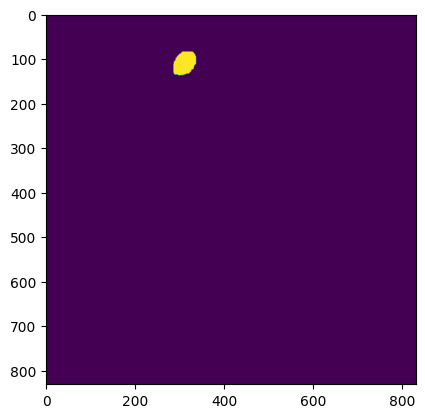

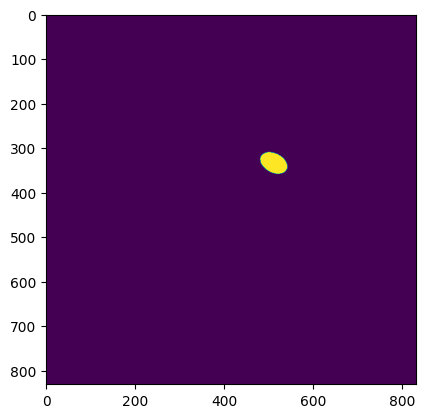

In [ ]:
plt.imshow(predicted_masks[0][0])
plt.show()
plt.imshow(ground_truth[0][5])
plt.show()